# Programowanie w Pythonie

## Laboratorium 12

### Importowanie bibliotek

In [1]:
from multiprocessing import Process
from multiprocessing import Queue
import matplotlib.pyplot as plt
import numpy as np

### Fraktal Mandelbrota 1

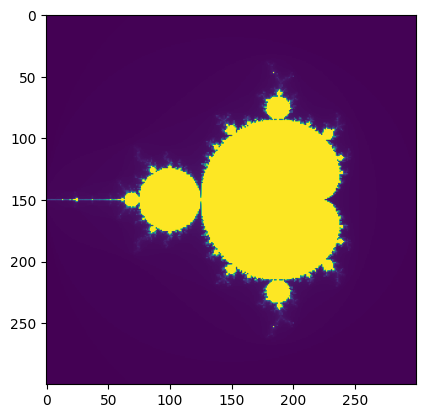

In [6]:
# Funkcja generująca fraktale
def julia(z):
    # Utwórz zmienną z0 i ustaw ją na wartość z
    z0 = z
    # Dla zakresu od 0 do 255
    for i in range(255):
        # Jeśli wartość bezwzględna z jest większa od 2
        if abs(z) > 2:
            # Zwróć licznik
            return i
        # Oblicz z jako z ^ 2 + z0
        z = z ** 2 + z0
    # Zwróć 255
    return 255

# Utworzenie przestrzeni liniowych x i y
x = np.arange (-2,   1,   .01)  # Przestrzeń liniowa x
y = np.arange (-1.5, 1.5, .01)  # Przestrzeń liniowa y

# Generacja przestrzeni punktów x i y
x, y = np.meshgrid(x, y)

# Generacja siatki
z = x + 1j * y

# Ustawienie kształtu wykresu
s = z.shape

# Obliczenie wykresu fraktali i zapisanie go w zmiennej wynikowej
result = np.array([[julia(z[i, j]) for j in range(s[1])] for i in range(s[0])])

# Rysowanie wykresu fraktali
plt.imshow(result)
plt.show()

### Fraktal Mandelbrota 2

/tmp/ipykernel_7492/565018024.py:25: RuntimeWarning: overflow encountered in square
  z = z ** 2 + z0
/tmp/ipykernel_7492/565018024.py:25: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + z0


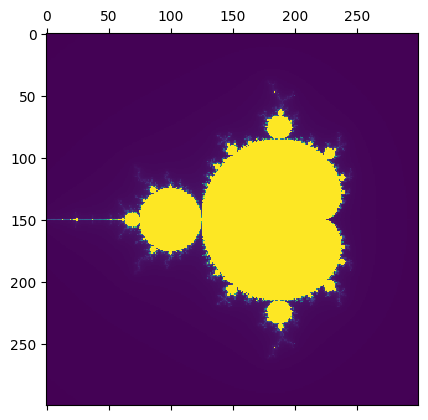

In [22]:
# Utworzenie przestrzeni liniowych x i y
x = np.arange (-2,   1,   .01)  # Przestrzeń liniowa x
y = np.arange (-1.5, 1.5, .01)  # Przestrzeń liniowa y

# Generacja przestrzeni punktów x i y
x, y = np.meshgrid(x, y)

# Generacja siatki
z = x + 1j * y

# Ustawienie kształtu wykresu
s = z.shape

# Wygenerowanie kopii siatki i zapisanie jej w z0
z0 = np.copy(z)

# Utworzenie zmiennej zapisującej wykres fraktali
result= np.ones(s) * 255

# Pętla obliczająca punkty na wykresie fraktali
for i in range(255):
    # Zapisywanie obliczonego punktu w tablicy wyników fraktali
    result[np.abs(z) > 2] = i
    # Obliczanie wartości dla następnych punktów wykresu fraktali
    z = z ** 2 + z0

# Rysowanie wykresu fraktali
plt.matshow(result)
plt.show()

### Fraktal Mandelbrota 3

In [27]:
# Funkcja generująca fraktale
def julia(z, a, queue):
    # Utwórz zmienną z0 i ustaw ją na wartość z
    z0 = z
    # Dla zakresu od 0 do 255
    for i in range(255):
        # Jeśli wartość bezwzględna z jest większa od 2
        if abs(z) > 2:
            # Zwróć licznik
            return i
        # Oblicz z jako z ^ 2 + z0
        z = z ** 2 + z0
    queue.put(a, result)

# Utworzenie przestrzeni liniowych x i y
x = np.arange (-2,   1,   .02)  # Przestrzeń liniowa x
y = np.arange (-1.5, 1.5, .02)  # Przestrzeń liniowa y

# Generacja przestrzeni punktów x i y
x, y = np.meshgrid(x, y)

# Generacja siatki
z = x + 1j * y

# Ustawienie kształtu wykresu
s = z.shape

# Utworzenie kolejki
queue = Queue()

# Utworzenie wielkości n
n = 4

# Utworzenie listy wartości
list = [z[:, i * s[1] // n:(i + 1) * s[1] // n] for i in range(n)]

# Utworzenie listy procesów
processes = [Process(target=julia, args=(list[i], i, queue)) for i in range(n)]

# Pętla do włączania kolejnych procesów
for i in processes:
    # Włączanie procesu i
    i.start()

# Sortowanie wartości w kolejce do zmiennej wynikowej
result= sorted([queue.get() for _ in range(n)], key = lambda x : x[0])

# Przekształcanie wartości wynikowych
result = [x[1] for x in result]

# Skonkatenowanie wartości wynikowych wzdłuż osi y-ów
result = np.hstack(result)

# Rysowanie wykresu fraktali
plt.matshow(result)
plt.show()

Process Process-9:
Process Process-10:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process Process-12:
  File "/home/codespace/.python/current/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/codespace/.python/current/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/tmp/ipykernel_7492/1120988678.py", line 8, in julia
    if abs(z) > 2:
  File "/home/codespace/.python/current/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process Process-11:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
  File "/home/codespace/.python/current/lib/python3.10/multiprocessing/process.py", line 315

KeyboardInterrupt: 

### Macierze

In [17]:
# Utworzenie i zainicjalizowanie wartości a, b i c jako tablice dwuwymiarowe
a = np.ones((3,3))       # Tablica jedynek - a[3][3]
b = 2 * np.ones((2, 3))  # Tablica dwójek -  b[2][3]
c = 5 * np.ones((3, 2))  # Tablica piątek -  c[3][2]

# Wyświetlenie macierzy a
print("Macierz a:")
print(a)
print()

# Wyświetlenie macierzy b
print("Macierz b:")
print(b)
print()

# Wyświetlenie macierzy c
print("Macierz c:")
print(c)
print()

# Wyświetlenie skonkatenowanych wzdłuż osi x-ów macierzy a oraz b
print("Wyświetlenie skonkatenowanych osi x-ów macierzy a oraz b:")
print(np.vstack((a, b)))
print()

# Wyświetlenie skonkatenowanych wzdłuż osi y-ów macierzy a oraz c
print("Wyświetlenie skonkatenowanych wzdłuż osi y-ów macierzy a oraz c:")
print(np.hstack((a, c)))
print()

# Utworzenie macierzy od podanych wartości
matrix = np.array([[1,2,3], [4,5,6], [7,8,9]])

# Utworzenie i zainicjalizowanie macierzy wartościami od 1 do 20
matrix = np.array([[i * j for i in range(1, 21)] for j in range(1, 11)])
# Wyświetlenie macierzy
print("Macierz:")
print(matrix)
print()

# Ustawienie wielkości macierzy
size = matrix.shape

# Utworzenie i zainicjalizowanie zmiennej n
n = 5

# Utworzenie i zainicjalizowanie zmiennej przechowującej wielkość macierzy
lenght = round(size[1] / n)

# Utworzenie macierzy scat dla podanych wartości n oraz wielkości macierzy
scat = [matrix[:, i * lenght:(i + 1) * lenght] for i in range(round(n))]

# Wyświetlenie macierzy scat
print("Scat:")
print(scat)

Macierz a:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Macierz b:
[[2. 2. 2.]
 [2. 2. 2.]]

Macierz c:
[[5. 5.]
 [5. 5.]
 [5. 5.]]

Wyświetlenie skonkatenowanych osi x-ów macierzy a oraz b:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]
 [2. 2. 2.]]

Wyświetlenie skonkatenowanych wzdłuż osi y-ów macierzy a oraz c:
[[1. 1. 1. 5. 5.]
 [1. 1. 1. 5. 5.]
 [1. 1. 1. 5. 5.]]

Macierz:
[[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   19  20]
 [  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
   38  40]
 [  3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54
   57  60]
 [  4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72
   76  80]
 [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
   95 100]
 [  6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 102 108
  114 120]
 [  7  14  21  28  35  42  49  56  63  70  77  84  91  98 105 112 119 126
  133 140]
 [  8  16  24  32  40  48  56